In [4]:
import ijson

In [5]:
filename = "md_traffic.json"
with open(filename, 'r') as f:
    objects = ijson.items(f, 'meta.view.columns.item')
    columns = list(objects)

In [6]:
print(columns[0])

{u'name': u'sid', u'format': {}, u'dataTypeName': u'meta_data', u'fieldName': u':sid', u'renderTypeName': u'meta_data', u'position': 0, u'id': -1}


In [7]:
column_names = [col["fieldName"] for col in columns]
column_names

[u':sid',
 u':id',
 u':position',
 u':created_at',
 u':created_meta',
 u':updated_at',
 u':updated_meta',
 u':meta',
 u'date_of_stop',
 u'time_of_stop',
 u'agency',
 u'subagency',
 u'description',
 u'location',
 u'latitude',
 u'longitude',
 u'accident',
 u'belts',
 u'personal_injury',
 u'property_damage',
 u'fatal',
 u'commercial_license',
 u'hazmat',
 u'commercial_vehicle',
 u'alcohol',
 u'work_zone',
 u'state',
 u'vehicle_type',
 u'year',
 u'make',
 u'model',
 u'color',
 u'violation_type',
 u'charge',
 u'article',
 u'contributed_to_accident',
 u'race',
 u'gender',
 u'driver_city',
 u'driver_state',
 u'dl_state',
 u'arrest_type',
 u'geolocation']

In [8]:
good_columns = [
    "date_of_stop", 
    "time_of_stop", 
    "agency", 
    "subagency",
    "description",
    "location", 
    "latitude", 
    "longitude", 
    "vehicle_type", 
    "year", 
    "make", 
    "model", 
    "color", 
    "violation_type",
    "race", 
    "gender", 
    "driver_state", 
    "driver_city", 
    "dl_state",
    "arrest_type"
]
data = []
with open(filename, 'r') as f:
    objects = ijson.items(f, 'data.item')
    for row in objects:
        selected_row = []
        for item in good_columns:
            selected_row.append(row[column_names.index(item)])
        data.append(selected_row)

In [9]:
data[0]

[u'2014-09-30T00:00:00',
 u'23:51:00',
 u'MCP',
 u'1st district, Rockville',
 u'DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED SIGNAL',
 u'PARK RD AT HUNGERFORD DR',
 None,
 None,
 u'02 - Automobile',
 u'2014',
 u'FORD',
 u'MUSTANG',
 u'BLACK',
 u'Citation',
 u'BLACK',
 u'M',
 u'MD',
 u'ROCKVILLE',
 u'MD',
 u'A - Marked Patrol']

In [10]:
import pandas as pd
stops = pd.DataFrame(data, columns = good_columns)

In [11]:
stops['color'].value_counts()

BLACK          163819
SILVER         150827
WHITE          123791
GRAY            88423
RED             65457
BLUE            60638
GREEN           32516
GOLD            26983
TAN             18546
BLUE, DARK      17678
MAROON          14348
BLUE, LIGHT     11399
N/A             10192
BEIGE            9997
GREEN, DK        9638
GREEN, LGT       4921
BROWN            3952
YELLOW           3168
ORANGE           2763
BRONZE           2049
PURPLE           1722
MULTICOLOR        712
CREAM             591
COPPER            282
PINK              131
CHROME             20
CAMOUFLAGE         16
Name: color, dtype: int64

In [12]:
stops['arrest_type'].value_counts()

A - Marked Patrol                         676620
Q - Marked Laser                           81025
B - Unmarked Patrol                        26679
O - Foot Patrol                             8419
L - Motorcycle                              7338
S - License Plate Recognition               7332
E - Marked Stationary Radar                 5837
R - Unmarked Laser                          3724
G - Marked Moving Radar (Stationary)        3226
I - Marked Moving Radar (Moving)            1275
M - Marked (Off-Duty)                       1203
F - Unmarked Stationary Radar                470
H - Unmarked Moving Radar (Stationary)       376
C - Marked VASCAR                            303
D - Unmarked VASCAR                          220
P - Mounted Patrol                           185
J - Unmarked Moving Radar (Moving)           168
N - Unmarked (Off-Duty)                      139
K - Aircraft Assist                           40
Name: arrest_type, dtype: int64

In [13]:
import numpy as np

In [14]:
def parse_float(x):
    try:
        x = float(x)
    except Exception:
        x = 0
    return x
stops['longitude'] = stops['longitude'].apply(parse_float)
stops['latitude'] = stops['latitude'].apply(parse_float)

In [15]:
import datetime

In [16]:
def parse_full_date(row):
    date = datetime.datetime.strptime(row['date_of_stop'], '%Y-%m-%dT%H:%M:%S')
    time = row['time_of_stop'].split(":")
    date = date.replace(hour=int(time[0]), minute=int(time[1]), second=int(time[2]))
    return date
stops['date'] = stops.apply(parse_full_date, axis=1)

(array([ 112490.,  141834.,  132803.,  124621.,  130677.,  182154.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

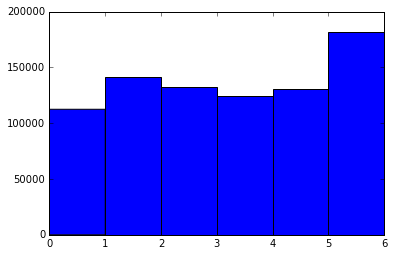

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(stops["date"].dt.weekday, bins = 6)

(array([ 45575.,  36209.,  27743.,  18529.,  11665.,   7722.,  12498.,
         29525.,  44500.,  40584.,  41409.,  35005.,  32470.,  32936.,
         34329.,  28836.,  38628.,  40935.,  32418.,  28959.,  32397.,
         45711.,  63208.,  62788.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

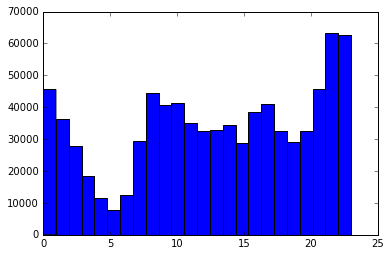

In [18]:
plt.hist(stops['date'].dt.hour, bins=24)

In [19]:
last_year = stops[stops['date'] > datetime.datetime(year = 2015, month = 2, day = 18)]

In [20]:
morning_rush = last_year[(last_year['date'].dt.weekday < 5) & (last_year['date'].dt.hour > 5) & (last_year['date'].dt.hour < 10)]
print morning_rush.shape
last_year.shape

(49286, 21)


(381443, 21)

In [24]:
import folium
from folium import plugins

stops_map = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
marker_cluster = folium.MarkerCluster().add_to(stops_map)
for name, row in morning_rush.iloc[:1000].iterrows():
    folium.Marker([row["longitude"], row["latitude"]], popup=row["description"]).add_to(marker_cluster)
stops_map.save('stops.html')
stops_map

In [25]:
stops_heatmap = folium.Map(location=[39.0836, -77.1483], zoom_start=11)
stops_heatmap.add_children(plugins.HeatMap([[row["longitude"], row["latitude"]] for name, row in morning_rush.iloc[:1000].iterrows()]))
stops_heatmap.save("heatmap.html")
stops_heatmap